# Importing Library

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Load Dataset

In [2]:
car_data = pd.read_csv('../Untitled Folder/characteristics.csv')
car_data.head()

,ID,manufacturer,model,category,mileage,year,gear_box_type,doors,wheel,color,interior_color,vin,leather_interior,deal_type,price,customs
0,0,NISSAN,Juke,Jeep,111111111,2010,Tiptronic,4/5,Left wheel,Carnelian red,Black,JN8AF5MV2BT011450,1,For Sale,7300,0
1,1,HYUNDAI,Santa FE,Jeep,88000,2013,Tiptronic,4/5,Left wheel,Grey,Black,NaN,1,For Sale,13600,0
2,2,CHEVROLET,Cruze,Sedan,140000,2013,Tiptronic,4/5,Left wheel,Silver,Black,NaN,1,For Sale,Price negotiable,640
3,3,TOYOTA,Prius,Sedan,71000,2013,Automatic,4/5,Left wheel,Grey,Black,NaN,1,For Sale,6100,0
4,4,SUZUKI,Grand Vitara,Jeep,155000,2008,Automatic,4/5,Left wheel,Grey,Black,JS3TD54V284130629,0,For Sale,6377,0


## Exploration 

In [3]:
print(car_data.info(), '\n') # Melihat informasi pada data
print(car_data.isna().sum(), '\n') # Melihat missing value pada data
print(car_data.shape) # Melihat ukuran data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80125 entries, 0 to 80124
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                80125 non-null  int64 
 1   manufacturer      80123 non-null  object
 2   model             80088 non-null  object
 3   category          80123 non-null  object
 4   mileage           80125 non-null  int64 
 5   year              80125 non-null  int64 
 6   gear_box_type     79779 non-null  object
 7   doors             78340 non-null  object
 8   wheel             80123 non-null  object
 9   color             78671 non-null  object
 10  interior_color    57910 non-null  object
 11  vin               43914 non-null  object
 12  leather_interior  80125 non-null  int64 
 13  deal_type         80125 non-null  object
 14  price             80125 non-null  object
 15  customs           80125 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 9.8+ MB
None 

ID   

## Cleaning Data & Preprocessing

In [4]:
# Menseleksi fitur yang tidak dibutuhkan pada data
car_data.drop(['ID', 'wheel','color','interior_color','vin',
               'leather_interior','customs'], axis=1, inplace=True)

# Menseleksi manufaktur mobil yang hanya ada di Indonesia
values_to_drop = ['ACURA','AUDI','VAZ','INFINITI', 'OPEL', 'LINCOLN', 'FIAT','SCION',
                  'CITROEN', 'DODGE', 'HUMMER', 'GAZ', 'VOLVO','სხვა', 'UAZ', 'ROVER',
                  'BUICK', 'SATURN', 'MOSKVICH', 'SAAB', 'FERRARI', 'BENTLEY', 'TESLA', 
                  'GMC', 'DAEWOO','MERCURY', 'MASERATI', 'GREATWALL', 'ZAZ','PONTIAC', 
                  'LANCIA', 'ALFA ROMEO', 'FOTON', 'HAVAL', 'SEAT']
car_data = car_data.drop(car_data[car_data['manufacturer'].isin(values_to_drop)].index)

In [5]:
# Membersihkan data pada fitur price
car_data.drop(car_data[car_data['price'] == 'Price negotiable'].index, inplace=True)
car_data = car_data.reset_index(drop=True)

# Mengganti nilai kurs mata uang pada fitur price dari dollars ke rupiah
car_data['price'] = car_data['price'].astype('float64')
car_data['price'] = car_data['price'] * 14529 

# Mengganti nilai pada fitur price yang kondisinya berstatus kendaraan dijual dikalikan dengan 0.4% agar bisa menjadi harga sewa
for data in range(len(car_data)):
    if car_data.iloc[data,7]=='For Sale':
        car_data.iloc[data,8] = car_data.iloc[data,8] * 0.004

## 2nd Exploration

In [6]:
# Harga mobil rental diluar nalar
car_data[(car_data['price'] > 10000000) & (car_data['deal_type']== 'For Rent')]

,manufacturer,model,category,mileage,year,gear_box_type,doors,deal_type,price
288,TOYOTA,Prius C,Hatchback,152000,2013,Automatic,4/5,For Rent,65380500.0
1562,HYUNDAI,Elantra,Sedan,112000,2013,Automatic,4/5,For Rent,77003700.0
1573,MERCEDES-BENZ,Viano Ambiente,Minivan,367000,2007,Tiptronic,4/5,For Rent,142093620.0
3560,MERCEDES-BENZ,Sprinter,Microbus,3000,2006,Manual,2/3,For Rent,196141500.0
3588,BMW,320,Sedan,167815,2001,Tiptronic,4/5,For Rent,45039900.0
3682,VOLKSWAGEN,Passat,Sedan,264000,2007,Automatic,4/5,For Rent,53757300.0
3775,NISSAN,X-Terra,Jeep,14200,2009,Automatic,4/5,For Rent,75550800.0
4660,TOYOTA,Prius,Hatchback,147000,2010,Automatic,4/5,For Rent,79909500.0
8717,TOYOTA,Aqua,Hatchback,109000,2013,Automatic,4/5,For Rent,41407650.0
9386,MERCEDES-BENZ,Sprinter,Microbus,360000,2008,Manual,4/5,For Rent,217935000.0


In [7]:
# Harga jual mobil diluar nalar (Human error) setelah harga diubah ke harga rental
car_data[(car_data['price'] > 10000000) & (car_data['deal_type']== 'For Sale')]

,manufacturer,model,category,mileage,year,gear_box_type,doors,deal_type,price
2825,VOLKSWAGEN,Golf,Sedan,7676,2007,Tiptronic,4/5,For Sale,4.875123e+08
14196,MERCEDES-BENZ,G 65 AMG 63AMG,Jeep,0,2020,Tiptronic,4/5,For Sale,1.162320e+07
23817,LAMBORGHINI,Urus,Universal,2531,2019,Tiptronic,4/5,For Sale,1.617682e+07
28983,MERCEDES-BENZ,ML 320,Jeep,111111111,2002,Tiptronic,4/5,For Sale,3.874400e+08
35791,SUBARU,Legacy,Sedan,97000,2003,Manual,4/5,For Sale,6.457333e+07
37380,BMW,328,Sedan,246000,2008,Automatic,4/5,For Sale,6.457333e+07


In [8]:
car_data[(car_data['price'] < 200000) & (car_data['deal_type']== 'For Sale')]

,manufacturer,model,category,mileage,year,gear_box_type,doors,deal_type,price
8,HYUNDAI,Veloster,Hatchback,34792,2019,Automatic,NaN,For Sale,98797.2
12,HYUNDAI,Tucson,Jeep,221126,2012,Automatic,4/5,For Sale,72645.0
13,HYUNDAI,Tucson,Jeep,176339,2012,Automatic,4/5,For Sale,92985.6
14,HYUNDAI,Tucson,Jeep,227824,2013,Automatic,4/5,For Sale,127855.2
15,HYUNDAI,Tucson,Jeep,3181,2020,Automatic,NaN,For Sale,130761.0
...,...,...,...,...,...,...,...,...,...
42484,HYUNDAI,Sonata,Sedan,0,2013,Automatic,4/5,For Sale,98797.2
42485,BMW,X5,Jeep,196614,2015,Automatic,4/5,For Sale,17434.8
42486,HONDA,FIT,Hatchback,137000,2008,Variator,4/5,For Sale,197594.4
42487,HYUNDAI,Sonata,Sedan,259934,2012,Automatic,4/5,For Sale,17434.8


In [9]:
car_data[car_data['year'] >= 2000]

,manufacturer,model,category,mileage,year,gear_box_type,doors,deal_type,price
0,NISSAN,Juke,Jeep,111111111,2010,Tiptronic,4/5,For Sale,424246.800
1,HYUNDAI,Santa FE,Jeep,88000,2013,Tiptronic,4/5,For Sale,790377.600
2,TOYOTA,Prius,Sedan,71000,2013,Automatic,4/5,For Sale,354507.600
3,SUZUKI,Grand Vitara,Jeep,155000,2008,Automatic,4/5,For Sale,370605.732
4,HYUNDAI,Sonata,Sedan,92000,2013,Automatic,4/5,For Sale,284768.400
...,...,...,...,...,...,...,...,...,...
42487,HYUNDAI,Sonata,Sedan,259934,2012,Automatic,4/5,For Sale,17434.800
42488,HYUNDAI,Sonata,Sedan,132899,2016,Automatic,4/5,For Sale,13076.100
42489,VOLKSWAGEN,Tiguan,Jeep,0,2015,Tiptronic,4/5,For Sale,1249029.072
42490,TOYOTA,Land Cruiser Prado LC150,Jeep,0,2019,Tiptronic,4/5,For Sale,2376944.400


In [10]:
# Mendrop data yang dirasa tidak valid
car_data = car_data.drop(car_data[car_data['price'] < 200000].index)

# Mendrop fitur deal_type
car_data.drop(['deal_type'], axis=1, inplace=True)

# Mengambil data mobil dengan status tahun produksi lebih dari 2000
car_data = car_data[car_data['year'] >= 2000]

# Melakukan imputasi pada fitur penumpang dengan missing value
car_data['doors'] = car_data['doors'].fillna(car_data['doors'].mode().iloc[0])

# # Membuang data duplikat
car_data.drop_duplicates(keep=False, inplace=True)
car_data.shape # Mengecek ukuran data

(19128, 8)

In [11]:
car_data.isna().sum()

manufacturer     0
model            2
category         0
mileage          0
year             0
gear_box_type    0
doors            0
price            0
dtype: int64

In [12]:
car_data.dropna(axis=0,inplace=True)  

In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19126 entries, 0 to 42492
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   19126 non-null  object 
 1   model          19126 non-null  object 
 2   category       19126 non-null  object 
 3   mileage        19126 non-null  int64  
 4   year           19126 non-null  int64  
 5   gear_box_type  19126 non-null  object 
 6   doors          19126 non-null  object 
 7   price          19126 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.3+ MB


## Outlier Detection

In [14]:
def remove_outliers(data, column):

#     Fungsi ini memiliki tujuan untuk memisahkan data outlier yang
#     berada pada dataframe

    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data

# Use the remove_outlier functions
car_data = remove_outliers(car_data, 'price')

# Checking data shape
car_data.shape

(17906, 8)

In [15]:
# Melihat data unik pada setiap kolom bertipe objek
print('Fitur Manufacture: \n', car_data['manufacturer'].unique(), 
      '\n', car_data['manufacturer'].unique().shape, '\n')
print('Fitur Model: \n',car_data['model'].unique(), '\n', 
      car_data['model'].unique().shape,'\n')
print('Fitur Category: \n',car_data['category'].unique(), 
      '\n', car_data['category'].unique().shape, '\n')
print('Fitur Category: \n',car_data['year'].unique(), '\n', 
      car_data['year'].unique().shape, '\n')
print('Fitur Gear Box Type: \n',car_data['gear_box_type'].unique(), 
      '\n', car_data['gear_box_type'].unique().shape)

Fitur Manufacture: 
 ['NISSAN' 'HYUNDAI' 'TOYOTA' 'SUZUKI' 'MINI' 'MERCEDES-BENZ' 'CHEVROLET'
 'BMW' 'VOLKSWAGEN' 'HONDA' 'KIA' 'LEXUS' 'SUBARU' 'MITSUBISHI' 'FORD'
 'MAZDA' 'JEEP' 'PORSCHE' 'LAND ROVER' 'CADILLAC' 'CHRYSLER' 'RENAULT'
 'JAGUAR' 'SKODA' 'SSANGYONG' 'PEUGEOT' 'ASTON MARTIN' 'MG' 'DAIHATSU'
 'ISUZU'] 
 (30,) 

Fitur Model: 
 ['Juke' 'Santa FE' 'Prius' ... 'Partner' 'Camry 55' 'E 350 CGI'] 
 (1566,) 

Fitur Category: 
 ['Jeep' 'Sedan' 'Hatchback' 'Minivan' 'Microbus' 'Goods wagon' 'Coupe'
 'Cabriolet' 'Universal' 'Pickup' 'Limousine'] 
 (11,) 

Fitur Category: 
 [2010 2013 2008 2011 2009 2004 2014 2005 2007 2000 2016 2018 2012 2017
 2019 2015 2002 2003 2006 2001 2020] 
 (21,) 

Fitur Gear Box Type: 
 ['Tiptronic' 'Automatic' 'Manual' 'Variator'] 
 (4,)


In [16]:
def one_hot_encoded(data, category):
# """
#     Fungsi ini 
# """
    one_hot_encoded = pd.get_dummies(data[category])
    fresh_data = pd.concat([data, one_hot_encoded], axis=1)
    return fresh_data 

# Menerapkan fungsi one_hot_encoded
encode_data = one_hot_encoded(car_data, 'manufacturer')
encode_data = one_hot_encoded(encode_data, 'model')
encode_data = one_hot_encoded(encode_data, 'category')
encode_data = one_hot_encoded(encode_data, 'year')
clean_data = one_hot_encoded(encode_data, 'gear_box_type')
#encode_data = one_hot_encoded(encode_data, 'doors')

# Menghapus fitur asli one hot encoding
clean_data.drop(['manufacturer', 'model', 'category', 'year', 'doors','gear_box_type'], axis=1, inplace=True)
clean_data = clean_data.reset_index(drop=True)
len(clean_data.columns) # Mengecek panjang fitur

1634

## Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(clean_data.drop(['price'],axis=1))

# Transform the data
normalized_data = scaler.transform(clean_data.drop(['price'],axis=1))
normalized_df = pd.DataFrame(normalized_data, columns=clean_data.drop(['price'],axis=1).columns)
normalized_df['price'] = clean_data['price'].astype('float64')

In [18]:
normalized_df

,mileage,manufacturer_ASTON MARTIN,manufacturer_BMW,manufacturer_CADILLAC,manufacturer_CHEVROLET,manufacturer_CHRYSLER,manufacturer_DAIHATSU,manufacturer_FORD,manufacturer_HONDA,manufacturer_HYUNDAI,...,year_2016,year_2017,year_2018,year_2019,year_2020,gear_box_type_Automatic,gear_box_type_Manual,gear_box_type_Tiptronic,gear_box_type_Variator,price
0,0.051740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,424246.800
1,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,790377.600
2,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,354507.600
3,0.000072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,370605.732
4,0.000043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,284768.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17901,0.000071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,912421.200
17902,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,366130.800
17903,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,755508.000
17904,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,258616.200


In [19]:
normalized_df['price'].max()

1018366.6680000001

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = normalized_df.drop(['price'],axis=1)
y = normalized_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 , random_state = 42)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 
print("y_train shape:", y_train.shape) 
print("y_test shape:", y_test.shape)

X_train shape: (16115, 1633)
X_test shape: (1791, 1633)
y_train shape: (16115,)
y_test shape: (1791,)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape) 
print("y_train shape:", y_train.shape)
print("X_test shape:", y_test.shape)

## Modelling

In [22]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
class RSquared(tf.keras.metrics.Metric):
    def __init__(self, name='r_squared', **kwargs):
        super(RSquared, self).__init__(name=name, **kwargs)
        self.total_residual = self.add_weight(name='total_residual', initializer='zeros')
        self.total_total = self.add_weight(name='total_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
        total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
        self.total_residual.assign_add(residual)
        self.total_total.assign_add(total)

    def result(self):
        r2_score = 1 - tf.math.divide_no_nan(self.total_residual, self.total_total)
        return r2_score

    def reset_states(self):
        self.total_residual.assign(0.0)
        self.total_total.assign(0.0)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1028, activation='relu', input_shape=(1633,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch/20))

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
             loss= 'mean_absolute_error',
             metrics= [RSquared()])

history = model.fit(X_train,
          y_train,
          epochs=100,
          callbacks=[lr_schedule],
          validation_data=(X_test,y_test)
         )

Epoch 1/100
500/504 [============================>.] - ETA: 0s - loss: 423362.5625 - r_squared: -4.8860

E:\anaconda3\lib\site-packages\keras\engine\training.py:2319: UserWarning: Metric RSquared implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


504/504 [==============================] - 7s 12ms/step - loss: 423304.5000 - r_squared: -4.8914 - val_loss: 425111.2188 - val_r_squared: -4.7559 - lr: 1.0000e-05
Epoch 2/100
504/504 [==============================] - 8s 16ms/step - loss: 422447.6250 - r_squared: -4.8809 - val_loss: 421853.0938 - val_r_squared: -4.6839 - lr: 1.1220e-05
Epoch 3/100
504/504 [==============================] - 8s 16ms/step - loss: 401942.0938 - r_squared: -4.4155 - val_loss: 366451.8125 - val_r_squared: -3.5439 - lr: 1.2589e-05
Epoch 4/100
504/504 [==============================] - 10s 20ms/step - loss: 244177.9375 - r_squared: -1.7169 - val_loss: 150138.7344 - val_r_squared: -0.2671 - lr: 1.4125e-05
Epoch 5/100
504/504 [==============================] - 7s 14ms/step - loss: 141069.1719 - r_squared: -0.0955 - val_loss: 139789.3438 - val_r_squared: -0.0330 - lr: 1.5849e-05
Epoch 6/100
504/504 [==============================] - 7s 13ms/step - loss: 133400.3906 - r_squared: 0.0376 - val_loss: 133284.4062 - va

(1e-05, 1.0, 0.0, 600000.0)

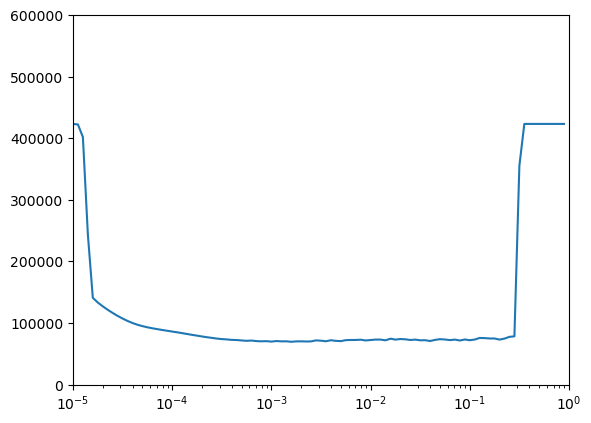

In [26]:
lrs = 1e-5 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history['loss'])  
plt.axis([1e-5, 1e-0, 0, 600000])

In [27]:
# test size = 0.25, r_squared = 0.7255

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1028, activation='relu', input_shape=(1633,), kernel_regularizer=tf.keras.regularizers.l1(0.05)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.05)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.05)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.05)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.05)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.05)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.05)),
    tf.keras.layers.Dense(1, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.05))
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
             loss= 'mean_absolute_error',
             metrics= [RSquared()])

history = model.fit(X_train,
          y_train,
          epochs=100,
          validation_data=(X_test,y_test)
         )

Epoch 1/100
502/504 [============================>.] - ETA: 0s - loss: 280452.1875 - root_mean_squared_error: 359435.2812 - r_squared: -2.4953

E:\anaconda3\lib\site-packages\keras\engine\training.py:2319: UserWarning: Metric RSquared implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


504/504 [==============================] - 10s 18ms/step - loss: 279845.9062 - root_mean_squared_error: 358922.8438 - r_squared: -2.4880 - val_loss: 95290.3984 - val_root_mean_squared_error: 133334.3438 - val_r_squared: 0.5365
Epoch 2/100
504/504 [==============================] - 7s 15ms/step - loss: 92957.0703 - root_mean_squared_error: 130281.4141 - r_squared: 0.5398 - val_loss: 88797.8594 - val_root_mean_squared_error: 124734.2109 - val_r_squared: 0.5943
Epoch 3/100
504/504 [==============================] - 8s 16ms/step - loss: 86554.2734 - root_mean_squared_error: 122648.9766 - r_squared: 0.5925 - val_loss: 85706.5469 - val_root_mean_squared_error: 120622.6953 - val_r_squared: 0.6206
Epoch 4/100
504/504 [==============================] - 9s 18ms/step - loss: 82622.2344 - root_mean_squared_error: 119423.3281 - r_squared: 0.6145 - val_loss: 82758.0469 - val_root_mean_squared_error: 118057.2734 - val_r_squared: 0.6366
Epoch 5/100
504/504 [==============================] - 9s 17ms/st

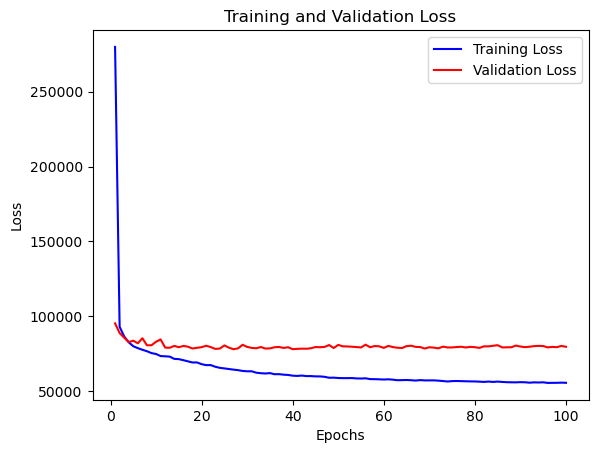

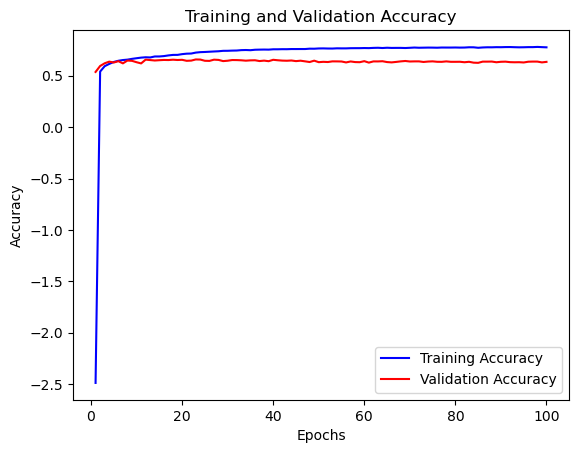

In [31]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['r_squared']
val_acc = history.history['val_r_squared']

# Visualize training loss and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize training accuracy and validation accuracy
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Manufaktur : 78 - 60
# Doors : 78 - 6
# Brand : gagal

In [32]:
normalized_df

,mileage,manufacturer_ASTON MARTIN,manufacturer_BMW,manufacturer_CADILLAC,manufacturer_CHEVROLET,manufacturer_CHRYSLER,manufacturer_DAIHATSU,manufacturer_FORD,manufacturer_HONDA,manufacturer_HYUNDAI,...,year_2016,year_2017,year_2018,year_2019,year_2020,gear_box_type_Automatic,gear_box_type_Manual,gear_box_type_Tiptronic,gear_box_type_Variator,price
0,0.051740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,424246.800
1,0.000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,790377.600
2,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,354507.600
3,0.000072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,370605.732
4,0.000043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,284768.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17901,0.000071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,912421.200
17902,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,366130.800
17903,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,755508.000
17904,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,258616.200


In [51]:
# Melihat data unik pada setiap kolom bertipe objek
print('Fitur Manufacture: \n', car_data['manufacturer'].unique(), 
      '\n', car_data['manufacturer'].unique().shape, '\n')
print('Fitur Model: \n',car_data['model'].unique(), '\n', 
      car_data['model'].unique().shape,'\n')
print('Fitur Category: \n',car_data['category'].unique(), 
      '\n', car_data['category'].unique().shape, '\n')
print('Fitur Tahun: \n',car_data['year'].unique(), '\n', 
      car_data['year'].unique().shape, '\n')
print('Fitur Gear Box Type: \n',car_data['gear_box_type'].unique(), 
      '\n', car_data['gear_box_type'].unique().shape)

Fitur Manufacture: 
 ['NISSAN' 'HYUNDAI' 'TOYOTA' 'SUZUKI' 'MINI' 'MERCEDES-BENZ' 'CHEVROLET'
 'BMW' 'VOLKSWAGEN' 'HONDA' 'KIA' 'LEXUS' 'SUBARU' 'MITSUBISHI' 'FORD'
 'MAZDA' 'JEEP' 'PORSCHE' 'LAND ROVER' 'CADILLAC' 'CHRYSLER' 'RENAULT'
 'JAGUAR' 'SKODA' 'SSANGYONG' 'PEUGEOT' 'ASTON MARTIN' 'MG' 'DAIHATSU'
 'ISUZU'] 
 (30,) 

Fitur Model: 
 ['Juke' 'Santa FE' 'Prius' ... 'Partner' 'Camry 55' 'E 350 CGI'] 
 (1566,) 

Fitur Category: 
 ['Jeep' 'Sedan' 'Hatchback' 'Minivan' 'Microbus' 'Goods wagon' 'Coupe'
 'Cabriolet' 'Universal' 'Pickup' 'Limousine'] 
 (11,) 

Fitur Tahun: 
 [2010 2013 2008 2011 2009 2004 2014 2005 2007 2000 2016 2018 2012 2017
 2019 2015 2002 2003 2006 2001 2020] 
 (21,) 

Fitur Gear Box Type: 
 ['Tiptronic' 'Automatic' 'Manual' 'Variator'] 
 (4,)


In [48]:
normalized_df.columns[31:1597]

Index(['model_1000', 'model_114', 'model_116', 'model_116 %::&5',
       'model_116 i', 'model_118', 'model_118 2,0', 'model_118 M-sport LCI',
       'model_120', 'model_128',
       ...
       'model_Yaris iA', 'model_Z4', 'model_Z4 3,0 SI', 'model_Z4 3.0',
       'model_i20', 'model_i3', 'model_i40', 'model_kona', 'model_kona SEL',
       'model_macan'],
      dtype='object', length=1566)

In [53]:
input_value0 = input("Masukkan nama mileage: ")
input_value1 = input("Masukkan nama manufaktur: ")
input_value2 = input("Masukkan nama model: ")
input_value3 = input("Masukkan nama kategori: ")
input_value4 = input("Masukkan nama Tahun: ")
input_value5 = input("Masukkan nama gear_box: ")

 
column_names1 = normalized_df.columns[1:31]  # Nama-nama kolom
column_names2 = normalized_df.columns[31:1597]
column_names3 = normalized_df.columns[1597:1608]
column_names4 = normalized_df.columns[1608:1629]
column_names5 = normalized_df.columns[1629:1633]

result_list = [input_value0] + \
              [1 if col == input_value1 else 0 for col in column_names1] + \
              [1 if col == input_value2 else 0 for col in column_names2] + \
              [1 if col == input_value3 else 0 for col in column_names3] + \
              [1 if col == input_value4 else 0 for col in column_names4] + \
              [1 if col == input_value5 else 0 for col in column_names5]

print(result_list)
data_predict = scaler.transform([result_list])
predictions = model.predict(data_predict)
print(predictions)

Masukkan nama mileage: 8000
Masukkan nama manufaktur: manufacturer_CADILLAC 	
Masukkan nama model: model_Juke
Masukkan nama kategori: category_Sedan
Masukkan nama Tahun: year_2018
Masukkan nama gear_box: gear_box_type_Automatic
['8000', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

E:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 302ms/step
[[289059.88]]


In [ ]:
manufacturer_ACURA
model_macan
gear_box_type_Automatic

In [ ]:
len(result_list)

In [ ]:
data_predict = scaler.transform([result_list])
predictions = model.predict(data_predict)
print(predictions)

# Convert TFLite

In [ ]:
export_dir = "../saved_model"
tf.saved_model.save(model, export_dir)


converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)


# Convert TFJS

In [ ]:
import time
saved_model_path = "./Untitled Folder/{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./